# 수도권 아파트 청약 뉴스 크롤링 EDA
- 아파트별 기사 수 확인
    - 평균: 10
    - 최대 18, 최소: 1
    - 기사수 상위/하위 30개 시각화
- 중복 기사 제거
    - 기준: 타이틀+아파트명
    - 기사 수 변화: 6214 -> 6117
- 기사 글자 수 확인
    - 평균: 1681
    - 최대 23224, 최소: 147
    - content_length 컬럼 추가
    - 글자 수 상위/하위 30개 시각화
- 전라도 광주 아파트 제거
    - 아파트/기사 수 변화: 616 -> 613 / 6117 -> 6084

In [ ]:
df_gg = pd.DataFrame({'apartment': ['광주태전 경남아너스빌 리미티드', '힐스테이트 광주곤지암역', '광주 송정 중흥S-클래스 파크뷰',
       '광주 탄벌 서희스타힐스 2단지', '광주 탄벌 서희스타힐스 1단지', '광주 더파크 비스타 데시앙',
       '두산위브 광주센트럴파크', '광주탄벌 서희스타힐스2단지', '광주탄벌 서희스타힐스1단지', '쌍용 더 플래티넘 광주',
       '광주 행정타운 아이파크', '광주 초월역 한라비발디']})

# 경기도 광주시 아파트를 식별하는 키워드
gg_gj = ['태전', '곤지암', '탄벌', '초월', '데시앙']

# 경기도 광주시 아파트만 필터링
df_gg_filtered = df[df['apartment'].str.contains('|'.join(gg_gj)) | 
                 (~df['apartment'].str.contains('송정|센트럴파크|행정타운'))]

print(df_gg_filtered)

                                            title  \
0        “7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다    
1                 올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳    
2         "지금 아니면 내집마련 못한다?"...새해 첫 84점 만점통장 나왔다    
3                     강달러 간다는데 환율 더 오르나 [3분 브리프]    
4        [1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양    
...                                           ...   
6209  인기 아파트 청약을 통해 살펴본 분양 트렌드, 타워형 경쟁률 낮고 가점...    
6210                    SM그룹·양우건설, 첫 분양서 미달 `쓴맛`    
6211   “분양경기 최악인데”…마수걸이 분양 나섰다 된서리 맞은 ‘SM·양우건...    
6212                          코로나에도…`줍줍`열기는 뜨거웠다    
6213                  규제 피한 2기 신도시 ‘분양 핫플레이스’ 되나    

                                                content  \
0     의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...   
1     '의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...   
2     아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...   
3     [한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...   
4     일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...   
...      

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

In [90]:
import pandas as pd
df = pd.read_csv('/Users/han-yeeun/mid-project/src/datasets/수도권_아파트_청약_뉴스_크롤링.csv', encoding='utf-8-sig')

In [91]:
df.head(10)

,title,content,url,apartment
0,“7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다,의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...,https://n.news.naver.com/mnews/article/009/000...,의왕 월암지구 대방 디에트르 레이크파크
1,올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳,'의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...,https://n.news.naver.com/mnews/article/011/000...,의왕 월암지구 대방 디에트르 레이크파크
2,"""지금 아니면 내집마련 못한다?""...새해 첫 84점 만점통장 나왔다",아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...,https://n.news.naver.com/mnews/article/014/000...,의왕 월암지구 대방 디에트르 레이크파크
3,강달러 간다는데 환율 더 오르나 [3분 브리프],[한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...,https://n.news.naver.com/mnews/article/277/000...,의왕 월암지구 대방 디에트르 레이크파크
4,[1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양,일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...,https://n.news.naver.com/mnews/article/031/000...,의왕 월암지구 대방 디에트르 레이크파크
5,'검단신도시파밀리에엘리프' 등…1월 첫째주 전국 5911가구 분양,1월 첫째주 분양캘린더다음 주 인천 서구 마전동 '검단신도시파밀리에엘리프'를 비롯해...,https://n.news.naver.com/mnews/article/008/000...,의왕 월암지구 대방 디에트르 레이크파크
6,전국 12개 단지서 5천911가구 분양…새해 첫 주,서울 시내 빌라 밀집 지역과 아파트 단지의 모습. 연합뉴스새해 첫째 주 전국에서 총...,https://n.news.naver.com/mnews/article/088/000...,의왕 월암지구 대방 디에트르 레이크파크
7,"새해 첫 주 부동산 캘린더, 전국 12개 단지서 5911가구 분양","부동산R114, 1월 첫째 주 검단신도시 파밀리에 엘리프, 래미안 송도역 센트리폴 ...",https://n.news.naver.com/mnews/article/241/000...,의왕 월암지구 대방 디에트르 레이크파크
8,[분양캘린더] '검단신도시파밀리에엘리프' 등 전국 5911가구 분양,견본주택 새해 맞아 한 주 쉬어가ⓒ News1 김초희 디자이너(서울=뉴스1) 한지명...,https://n.news.naver.com/mnews/article/421/000...,의왕 월암지구 대방 디에트르 레이크파크
9,'검단신도시파밀리에엘리프' 등 5911가구 분양예정[분양캘린더],일반분양 5014가구…모델하우스 오픈은 없어[서울=뉴시스] 28일 부동산R114에 ...,https://n.news.naver.com/mnews/article/003/001...,의왕 월암지구 대방 디에트르 레이크파크


In [92]:
df.tail(10)

,title,content,url,apartment
6204,올해 1~4월 1순위 청약경쟁률 ‘0’ 현장들 공통점이…,올해 초에는 코로나19 여파로 실물 모델하우스보다 사이버 모델하우스 오픈으로 대체한...,https://n.news.naver.com/mnews/article/009/000...,양주옥정유림노르웨이숲
6205,세자릿수 경쟁률에 완판까지… 인기 치솟는 수도권 새 아파트,"호반써밋 목동 평균 128대 1미분양 양주서도 1순위 마감""청약단지 양극화 지속될 ...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6206,수도권 ‘청약불패’ 계속되나…세 자릿수 경쟁률에 비인기지역도 첫 완...,"4월 넷째주 수도권 청약단지 4곳 완판""잘 되는 지역 계속 잘 될 것""[디지털타임스...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6207,"뚜렷한 브랜드 양극화… 대형사 웃고, 중소업체 울었다","대형사, 수백 대 1 청약경쟁률중·소건설 9곳서 미분양 행진업계 ""사업성 여부 따라...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6208,분양시장 ‘브랜드 양극화’ 심화…외면받는 중·소건설사,"1분기 33곳 분양해 24곳 순위 내 마감…""10곳 중 7곳 완판""순위 내 미분양 ...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6209,"인기 아파트 청약을 통해 살펴본 분양 트렌드, 타워형 경쟁률 낮고 가점...",코로나19 감염 확산이 장기화되면서 국내 경제 산업 전반에 ‘경고음’이 커지고 있다...,https://n.news.naver.com/mnews/article/009/000...,양주옥정유림노르웨이숲
6210,"SM그룹·양우건설, 첫 분양서 미달 `쓴맛`",수도권 분양경기 침체 영향아파트 브랜드 인지도 낮고코로나 여파에 홍보도 못해중견건설...,https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6211,“분양경기 최악인데”…마수걸이 분양 나섰다 된서리 맞은 ‘SM·양우건...,"올해 경기도 양주·파주서 첫 분양 나서 두 단지 모두 1순위 미달""SM그룹·양우건설...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6212,코로나에도…`줍줍`열기는 뜨거웠다,양주 노르웨이숲 무순위 청약주말 아침부터 수백명 몰려14일 양주옥정 노르웨이숲 견본...,https://n.news.naver.com/mnews/article/009/000...,양주옥정유림노르웨이숲
6213,규제 피한 2기 신도시 ‘분양 핫플레이스’ 되나,상반기 14곳 1만3234가구 공급 / 잇단 부동산대책에 비규제 쏠림 가속 / 경기...,https://n.news.naver.com/mnews/article/022/000...,양주옥정유림노르웨이숲


In [93]:
df['apartment'].nunique()

616

In [94]:
# 아파트별 기사 수 계산
article_counts = df['apartment'].value_counts()
print(article_counts)

apartment
의왕고천지구 대방 디에트르 센트럴(B1BL)            18
의왕 센트라인 데시앙                         17
청계리버뷰자이                             17
아크로 리츠카운티                           17
브이티스타일                              17
                                    ..
평택 고덕국제신도시 A-43블럭 호반써밋II             1
시화MTV 공동2블록 더 퍼스트 시흥                 1
화성향남 상신지구 A1-1블록 향남역 한양수자인 디에스티지     1
인천 청라국제도시 A-3블록 호반베르디움               1
이천 백사지구 1BL 신안실크밸리                   1
Name: count, Length: 616, dtype: int64


In [95]:
# 아파트별 기사 수 통계
article_counts.describe()

count    616.000000
mean      10.087662
std        3.559315
min        1.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: count, dtype: float64

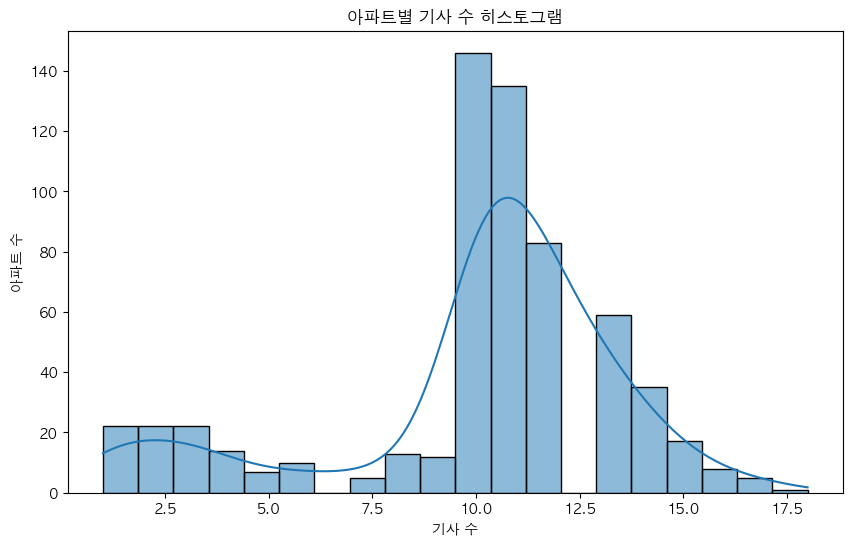

In [96]:
# 아파트별 기사 수 시각화
plt.figure(figsize=(10, 6))
sns.histplot(article_counts, bins=20, kde=True)
plt.title('아파트별 기사 수 히스토그램')
plt.xlabel('기사 수')
plt.ylabel('아파트 수')
plt.show()

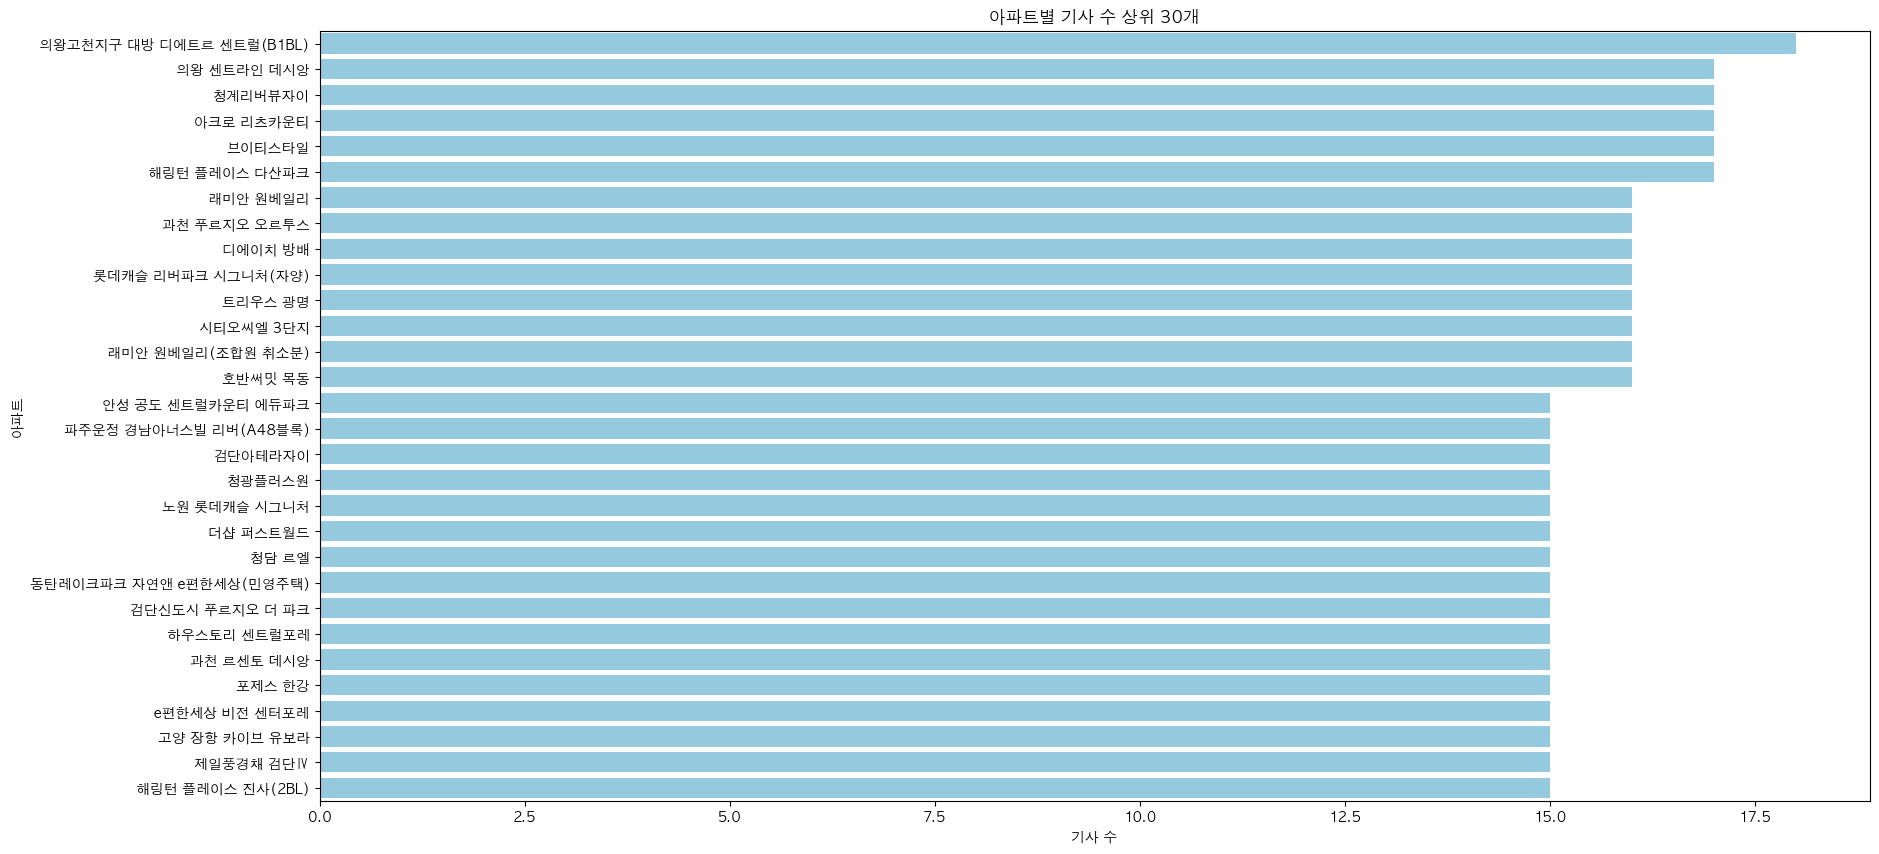

In [97]:
# 아파트별 기사 수 상위 30개 시각화
plt.figure(figsize=(20, 10))
sns.barplot(x=article_counts.head(30), y=article_counts.head(30).index, color='skyblue')
plt.title('아파트별 기사 수 상위 30개')
plt.xlabel('기사 수')
plt.ylabel('아파트')
plt.show()

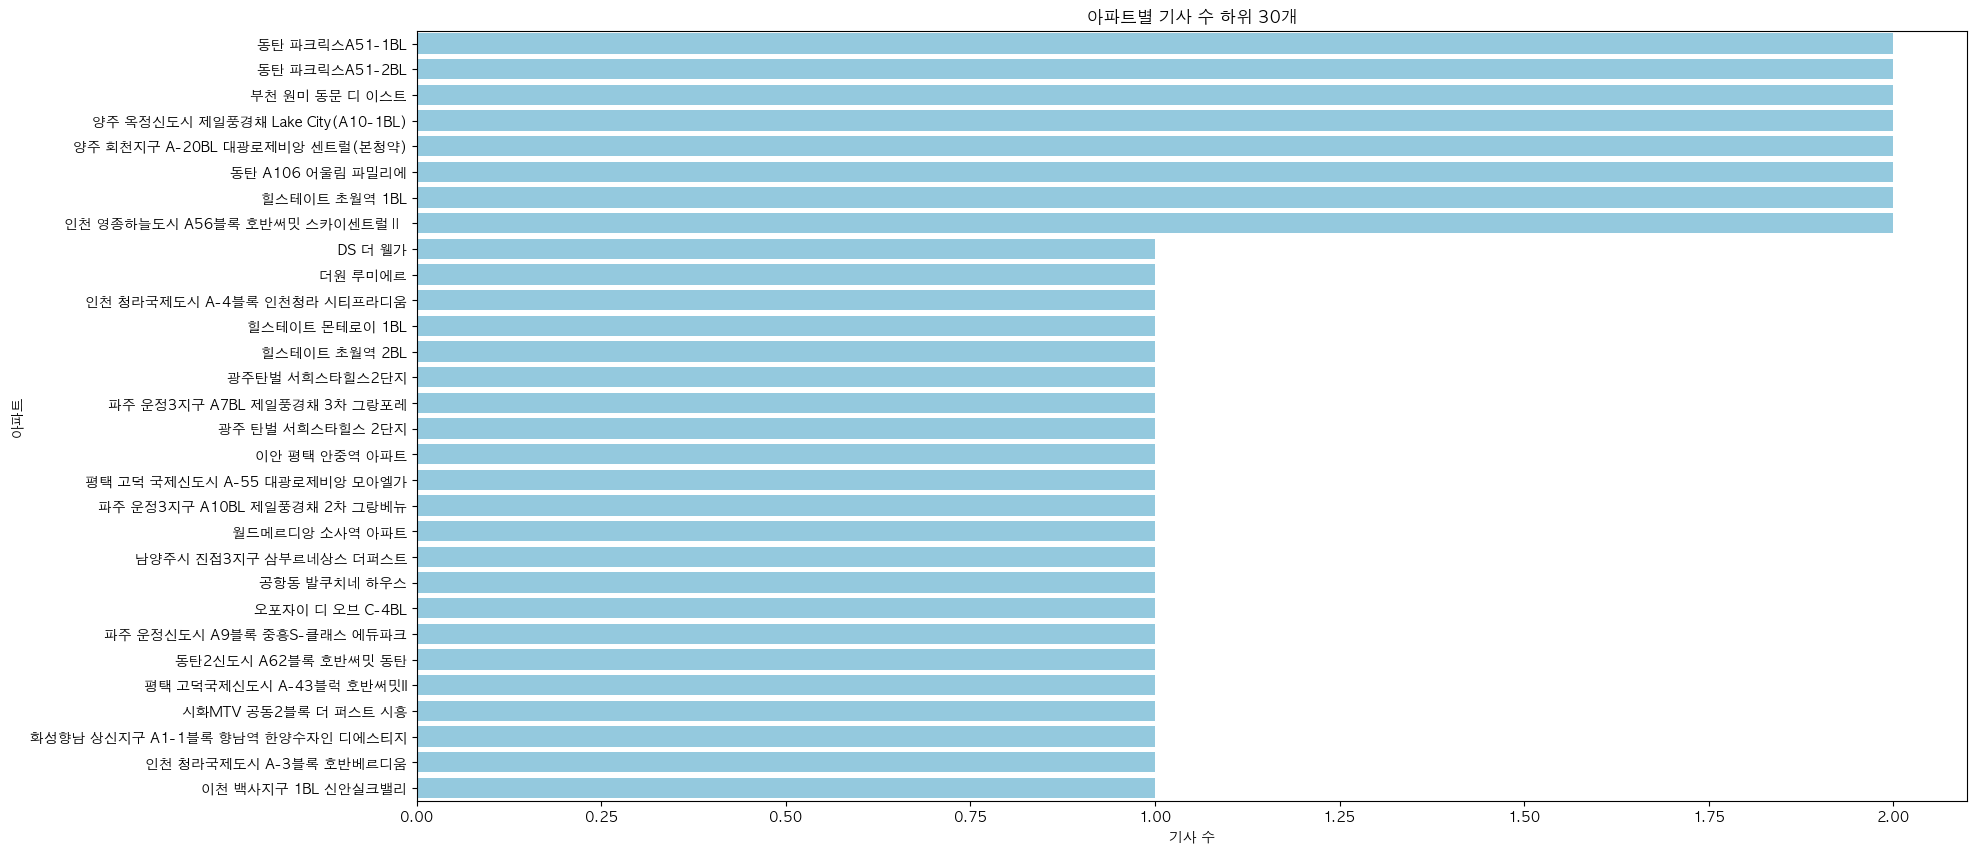

In [98]:
# 아파트별 기사 수 하위 30개 시각화
plt.figure(figsize=(20, 10))
sns.barplot(x=article_counts.tail(30), y=article_counts.tail(30).index, color='skyblue')
plt.title('아파트별 기사 수 하위 30개')
plt.xlabel('기사 수')
plt.ylabel('아파트')
plt.show()

In [100]:
# 중복 기사 제거 전 데이터 수와 고유 아파트 수 확인
print(df.shape)
print(df['apartment'].nunique())

(6214, 4)
616


In [101]:
# 타이틀과 아파트명 컬럼을 기준으로 중복 기사 제거
df = df.drop_duplicates(subset=['title', 'apartment'], keep='first')
print(df.shape)

(6117, 4)


In [102]:
# 중복 기사 제거 후 아파트별 기사 수 계산
article_counts = df['apartment'].value_counts()
print(article_counts)

apartment
의왕고천지구 대방 디에트르 센트럴(B1BL)        18
브이티스타일                          17
아크로 리츠카운티                       17
해링턴 플레이스 다산파크                   17
청계리버뷰자이                         17
                                ..
평택 고덕국제신도시 A-43블럭 호반써밋II         1
파주 운정신도시 A9블록 중흥S-클래스 에듀파크       1
공항동 발쿠치네 하우스                     1
파주 운정3지구 A10BL 제일풍경채 2차 그랑베뉴     1
오포자이 디 오브 C-4BL                  1
Name: count, Length: 616, dtype: int64


In [103]:
# 중복 기사 제거 후 데이터 수와 고유 아파트 수 확인
print(df.shape)
print(df['apartment'].nunique())

(6117, 4)
616


In [104]:
# 기사 내용 글자수 계산
df['content_length'] = df['content'].astype(str).apply(len)

# 기사 내용 글자수 통계
df['content_length'].describe()

count     6117.000000
mean      1681.392022
std        802.401346
min        147.000000
25%       1217.000000
50%       1591.000000
75%       2003.000000
max      23224.000000
Name: content_length, dtype: float64

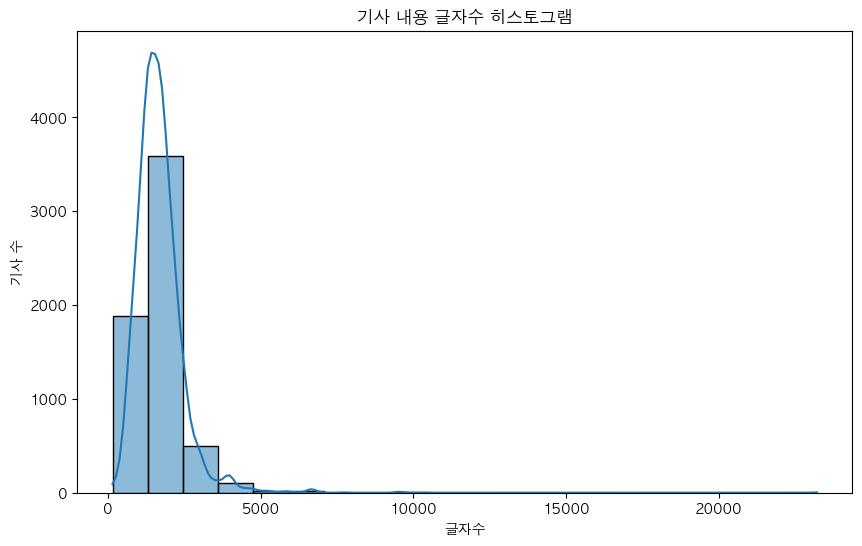

In [105]:
# 기사 내용 글자수 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], bins=20, kde=True)
plt.title('기사 내용 글자수 히스토그램')
plt.xlabel('글자수')
plt.ylabel('기사 수')
plt.show()

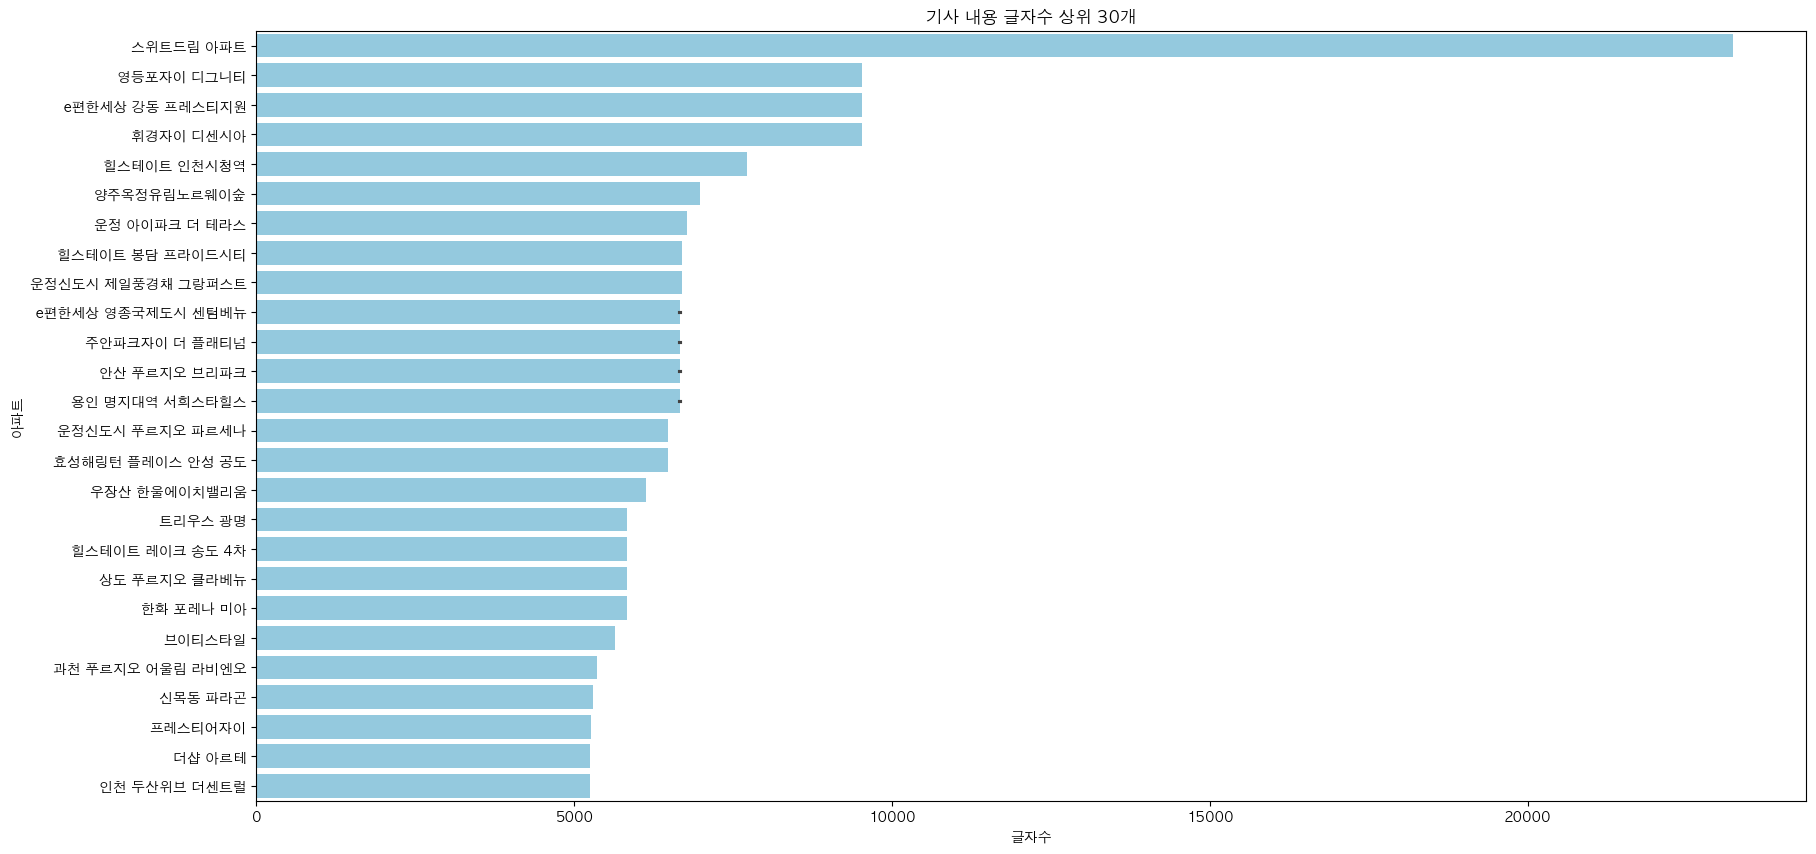

In [106]:
# 기사 내용 글자수 상위 30개 시각화
plt.figure(figsize=(20, 10))
sns.barplot(x=df['content_length'].sort_values(ascending=False).head(30), y=df['apartment'].loc[df['content_length'].sort_values(ascending=False).head(30).index], color='skyblue')
plt.title('기사 내용 글자수 상위 30개')
plt.xlabel('글자수')
plt.ylabel('아파트')
plt.show()

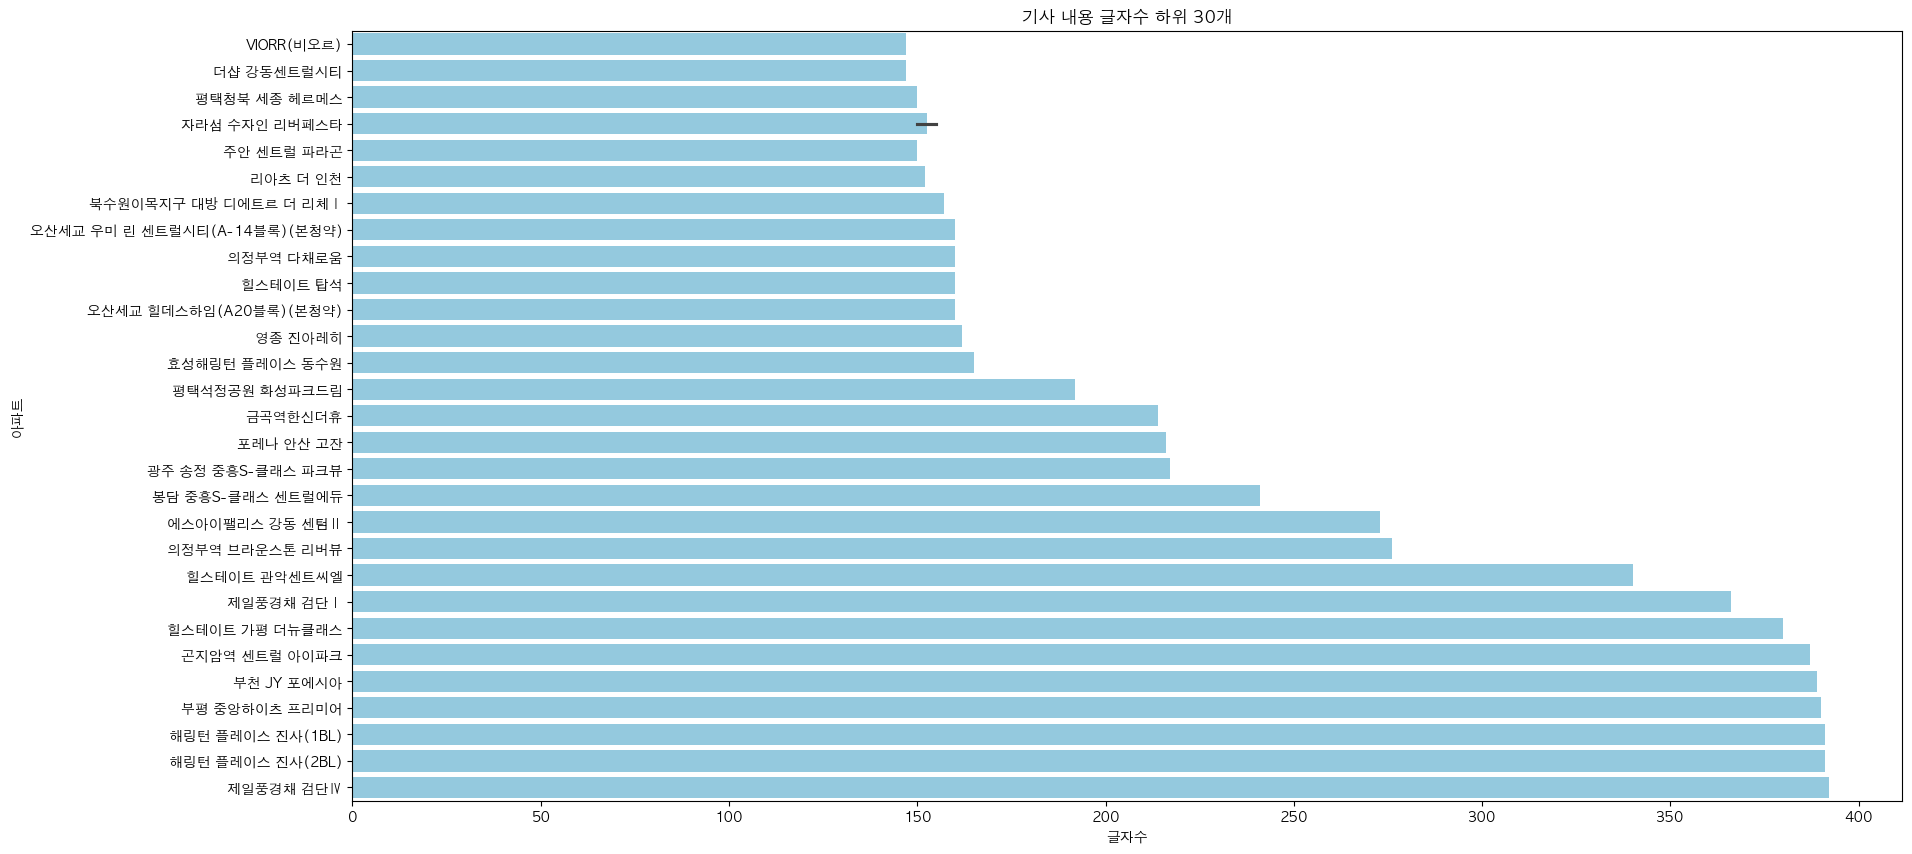

In [107]:
# 기사 내용 글자수 하위 30개 시각화
plt.figure(figsize=(20, 10))
sns.barplot(x=df['content_length'].sort_values().head(30), y=df['apartment'].loc[df['content_length'].sort_values().head(30).index], color='skyblue')
plt.title('기사 내용 글자수 하위 30개')
plt.xlabel('글자수')
plt.ylabel('아파트')
plt.show()

In [114]:
# 광주 아파트만 추출
df_gwangju = df[df['apartment'].str.contains('광주')]
df_gwangju['apartment'].unique()

array(['광주태전 경남아너스빌 리미티드', '힐스테이트 광주곤지암역', '광주 송정 중흥S-클래스 파크뷰',
       '광주 탄벌 서희스타힐스 2단지', '광주 탄벌 서희스타힐스 1단지', '광주 더파크 비스타 데시앙',
       '두산위브 광주센트럴파크', '광주탄벌 서희스타힐스2단지', '광주탄벌 서희스타힐스1단지', '쌍용 더 플래티넘 광주',
       '광주 행정타운 아이파크', '광주 초월역 한라비발디'], dtype=object)

In [115]:
# 전라도 광주 아파트 제거
jeonnam_gj_apt = ['광주 송정 중흥S-클래스 파크뷰', '두산위브 광주센트럴파크', '광주 행정타운 아이파크']

# 전라도 광주 아파트 행 삭제
df = df[~df['apartment'].isin(jeonnam_gj_apt)]

In [117]:
# 전라도 광주 아파트 제거 후 데이터 수와 고유 아파트 수 확인
print(df.shape)
print(df['apartment'].nunique())

(6084, 5)
613


In [118]:
df.head(10)

,title,content,url,apartment,content_length
0,“7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다,의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...,https://n.news.naver.com/mnews/article/009/000...,의왕 월암지구 대방 디에트르 레이크파크,714
1,올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳,'의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...,https://n.news.naver.com/mnews/article/011/000...,의왕 월암지구 대방 디에트르 레이크파크,606
2,"""지금 아니면 내집마련 못한다?""...새해 첫 84점 만점통장 나왔다",아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...,https://n.news.naver.com/mnews/article/014/000...,의왕 월암지구 대방 디에트르 레이크파크,922
3,강달러 간다는데 환율 더 오르나 [3분 브리프],[한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...,https://n.news.naver.com/mnews/article/277/000...,의왕 월암지구 대방 디에트르 레이크파크,1092
4,[1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양,일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...,https://n.news.naver.com/mnews/article/031/000...,의왕 월암지구 대방 디에트르 레이크파크,702
5,'검단신도시파밀리에엘리프' 등…1월 첫째주 전국 5911가구 분양,1월 첫째주 분양캘린더다음 주 인천 서구 마전동 '검단신도시파밀리에엘리프'를 비롯해...,https://n.news.naver.com/mnews/article/008/000...,의왕 월암지구 대방 디에트르 레이크파크,880
6,전국 12개 단지서 5천911가구 분양…새해 첫 주,서울 시내 빌라 밀집 지역과 아파트 단지의 모습. 연합뉴스새해 첫째 주 전국에서 총...,https://n.news.naver.com/mnews/article/088/000...,의왕 월암지구 대방 디에트르 레이크파크,436
7,"새해 첫 주 부동산 캘린더, 전국 12개 단지서 5911가구 분양","부동산R114, 1월 첫째 주 검단신도시 파밀리에 엘리프, 래미안 송도역 센트리폴 ...",https://n.news.naver.com/mnews/article/241/000...,의왕 월암지구 대방 디에트르 레이크파크,520
8,[분양캘린더] '검단신도시파밀리에엘리프' 등 전국 5911가구 분양,견본주택 새해 맞아 한 주 쉬어가ⓒ News1 김초희 디자이너(서울=뉴스1) 한지명...,https://n.news.naver.com/mnews/article/421/000...,의왕 월암지구 대방 디에트르 레이크파크,920
9,'검단신도시파밀리에엘리프' 등 5911가구 분양예정[분양캘린더],일반분양 5014가구…모델하우스 오픈은 없어[서울=뉴시스] 28일 부동산R114에 ...,https://n.news.naver.com/mnews/article/003/001...,의왕 월암지구 대방 디에트르 레이크파크,1019
